In [141]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [142]:
velha = pd.read_csv('amostras_.csv',sep=';')
#velha = pd.read_csv('amostras.csv',sep=';')
velha.describe

<bound method NDFrame.describe of      pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9       classe
0       0     0     0     0     0     0     0     0     0      Em_jogo
1       1     0     0     0     0     0     0     0     0      Em_jogo
2       1    -1     0     0     0     0     0     0     0      Em_jogo
3       1    -1     1     0     0     0     0     0     0      Em_jogo
4       1    -1     1    -1     0     0     0     0     0      Em_jogo
..    ...   ...   ...   ...   ...   ...   ...   ...   ...          ...
226    -1     1    -1     0    -1     1    -1     1     1  Fim_de_jogo
227    -1     1     1     1    -1    -1     1    -1     1  Fim_de_jogo
228    -1     1     1     1    -1    -1    -1     1     1  Fim_de_jogo
229    -1     1     1     1     1    -1    -1    -1     1  Fim_de_jogo
230    -1    -1     1     1     1    -1    -1     1     1  Fim_de_jogo

[231 rows x 10 columns]>

In [143]:
X = velha.drop(columns=['classe'])
y = velha['classe'].values

In [144]:
treino_X, teste_X, treino_y, teste_y = tts(X, y, random_state=42,test_size=0.2, stratify=y)

In [145]:
clf = neighbors.KNeighborsClassifier(n_neighbors=20)

clf.fit(X.values, y)

,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [146]:

predicao = clf.predict(teste_X.values)

for i in range(0,len(teste_X.values)):
  print(teste_X.values[i], "predicao: ", predicao[i])



[1 0 0 0 0 0 0 0 0] predicao:  Em_jogo
[ 1 -1  1 -1  0 -1  1 -1  1] predicao:  Possibilidade_de_fim_de_jogo
[ 0  1 -1  1  1  0 -1 -1  1] predicao:  Em_jogo
[ 0  1 -1  1 -1 -1  0  1  1] predicao:  Possibilidade_de_fim_de_jogo
[ 0  1 -1  1  0 -1 -1  1  0] predicao:  Possibilidade_de_fim_de_jogo
[ 1 -1  1 -1  0 -1  1  0  0] predicao:  Em_jogo
[-1  1 -1  1  1 -1  1  0 -1] predicao:  Fim_de_jogo
[ 1 -1  1 -1 -1  0  1  0  1] predicao:  Possibilidade_de_fim_de_jogo
[ 0  1 -1  1 -1  1  0  0  0] predicao:  Possibilidade_de_fim_de_jogo
[-1  1 -1  1  0  0  1 -1  0] predicao:  Em_jogo
[ 1 -1  1 -1 -1  0  0  1  0] predicao:  Em_jogo
[ 0  1 -1  1  1  0  0 -1  0] predicao:  Em_jogo
[-1  1 -1  1 -1  0  1  0  0] predicao:  Em_jogo
[-1 -1  1  1  1 -1 -1  1  1] predicao:  Fim_de_jogo
[-1  1 -1 -1  1  1 -1  0  1] predicao:  Em_jogo
[ 1 -1  1 -1  1  1  1 -1 -1] predicao:  Possibilidade_de_fim_de_jogo
[-1  1 -1  1  0  0 -1  0  1] predicao:  Em_jogo
[-1  1 -1  1  1 -1  0 -1  1] predicao:  Em_jogo
[-1  1  1  

In [147]:
k_values = []
accuracies = []
maior = 0
melhor_k = 2
for k in range(2, 50):
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(treino_X.values, treino_y)
  print("k = ", k, "acuracia = ", clf.score(teste_X.values, teste_y))

  acertos = 0
  for i in range(0,len(teste_X)):
    predicao = clf.predict([teste_X.values[i]])
    #print(teste_X.values[i], "predicao: ", predicao)
    if predicao == teste_y[i]:
      acertos += 1
  acc = acertos / len(teste_X)
  print("Acertos: ", acertos)
  print("Erros: ", len(teste_X) - acertos)
  print("Acuracia: ", acc)
  k_values.append(k)
  accuracies.append(acc)
  if acc > maior:
    maior = acc
    melhor_k = k
print("Melhor k: ", melhor_k)
print("Maior acuracia: ", maior)


k =  2 acuracia =  0.46808510638297873
Acertos:  22
Erros:  25
Acuracia:  0.46808510638297873
k =  3 acuracia =  0.5531914893617021
Acertos:  26
Erros:  21
Acuracia:  0.5531914893617021
k =  4 acuracia =  0.6382978723404256
Acertos:  30
Erros:  17
Acuracia:  0.6382978723404256
k =  5 acuracia =  0.6170212765957447
Acertos:  29
Erros:  18
Acuracia:  0.6170212765957447
k =  6 acuracia =  0.6382978723404256
Acertos:  30
Erros:  17
Acuracia:  0.6382978723404256
k =  7 acuracia =  0.6382978723404256
Acertos:  30
Erros:  17
Acuracia:  0.6382978723404256
k =  8 acuracia =  0.5957446808510638
Acertos:  28
Erros:  19
Acuracia:  0.5957446808510638
k =  9 acuracia =  0.5531914893617021
Acertos:  26
Erros:  21
Acuracia:  0.5531914893617021
k =  10 acuracia =  0.5531914893617021
Acertos:  26
Erros:  21
Acuracia:  0.5531914893617021
k =  11 acuracia =  0.5957446808510638
Acertos:  28
Erros:  19
Acuracia:  0.5957446808510638
k =  12 acuracia =  0.5531914893617021
Acertos:  26
Erros:  21
Acuracia:  0.

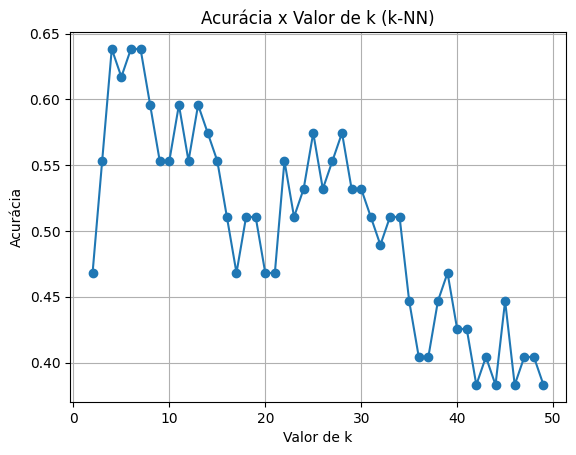

In [148]:
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("Valor de k")
plt.ylabel("Acurácia")
plt.title("Acurácia x Valor de k (k-NN)")
plt.grid(True)
plt.show()